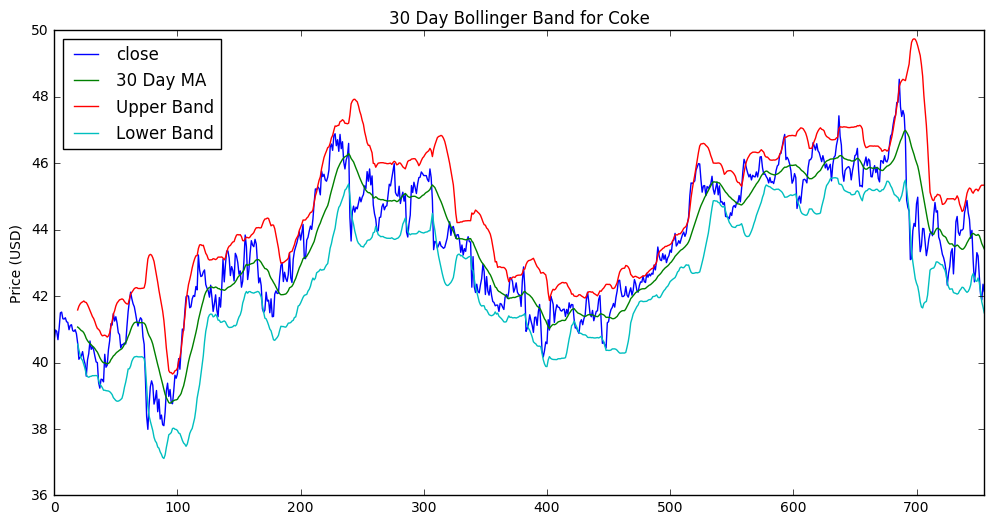

In [1]:
# Bollinger curve adapted from https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
from pandas_datareader import data as web
%matplotlib inline

# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    #info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    dfHistorical = pd.read_csv('C:\DataIncubator\Project\CokeData\\CokeHistoricalPrices.csv')
    return dfHistorical #pd.DataFrame(info)

# Get Adjusted Closing Prices for Facebook, Tesla and Amazon between 2016-2017
coke = get_adj_close('KO', '1/2/2016', '31/12/2017')
#fb = get_adj_close('fb', '1/2/2016', '31/12/2017')
#tesla = get_adj_close('tsla', '1/2/2016', '31/12/2017')
#amazon = get_adj_close('amzn', '1/2/2016', '31/12/2017')

# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
coke['30 Day MA'] = coke['close'].rolling(window=20).mean()
coke['30 Day STD'] = coke['close'].rolling(window=20).std()
coke['Upper Band'] = coke['30 Day MA'] + (coke['30 Day STD'] * 2)
coke['Lower Band'] = coke['30 Day MA'] - (coke['30 Day STD'] * 2)
    
# Simple 30 Day Bollinger Band for Facebook (2016-2017)
coke[['close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
#print(coke.head())
plt.title('30 Day Bollinger Band for Coke')
plt.ylabel('Price (USD)')
plt.show();

In [ ]:
#looking at RSI from here https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas
